In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

Okay! 让我们回到自行车数据集。我们很好奇蒙特利尔到底是用自行车来通勤的人多呢呢还是骑车出门玩玩的人更多。转换成实际的数据问题就是，工作日骑车的人更多还是周末骑车的人更多？

# 4.1 给数据集添加一列weekday

首先读取数据，这个之前就做了。

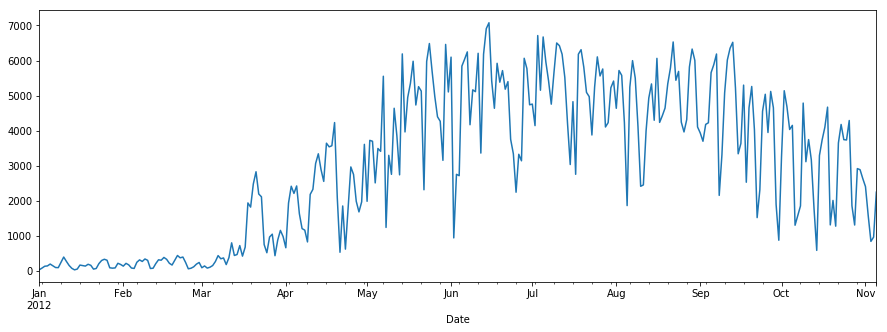

In [2]:
bikes = pd.read_csv('../data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
_ = bikes['Berri 1'].plot()

接下来，我们只看Berri这条路。Berri路上有着蒙特利尔市一条相当重要的自行车道。

首先，创建一个只包含Berri路信息的DataFrame：

In [29]:
berri_bikes = bikes[['Berri 1']] #生成DataFrames使用双中括号
# berri_bikes = bikes['Berri 1'] #生成Series使用单中括号

In [30]:
berri_bikes.head()
# type(berri_bikes) 

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


接下来，我们需要创建一列‘Weekday’。首先，我们从index（索引）中获取日期信息。忘了说了，前面导入的时候指定了Date为索引，可以看到，索引在DataFrame的左边单独显示。包含了2012年的每一天。

In [31]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30', '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03', '2012-11-04', '2012-11-05'], dtype='datetime64[ns]', name='Date', length=310, freq=None)

可以看到有些天的数据丢失了，总共只有310天的数据，天知道为啥那几天的数据没了?_?

pandas有一系列获取time series的函数，因此，如果想要得到每一行数据对应到每个月第几天的话，可以这么做：

In [32]:
berri_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5], dtype='int64', name='Date', length=310)

事实上，我们需要的是weekday，因此可以这么做：

In [33]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0], dtype='int64', name='Date', length=310)

这就是星期几的数据了，**其中0表示星期一**。呃，我发现0表示星期一是因为我查看了日历的。。。

现在，我们知道如何*获取*星期几的数据了，那么可以像下面这样添加到DataFrame中去：

In [34]:
berri_bikes['Weekday'] = berri_bikes.index.weekday
berri_bikes.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Berri 1,Weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


# 4.2 按照星期几计算总的骑车人数

DataFrame有一个 `.groupby()` 方法。如果你熟悉SQL的话，你会发现它有点类似与SQL的groupby语句。我暂且不解释这个，如果你想知道更多的话，可以看看这个[文档](http://pandas.pydata.org/pandas-docs/stable/groupby.html)

因此， `berri_bikes.groupby('Weekday').aggregate(sum)` 的意思就是说，首先将数据按照Weekday分组，然后对每一组的数据求和。

In [35]:
weekday_counts = berri_bikes.groupby('Weekday').aggregate(sum)
weekday_counts

,Berri 1
Weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


 0, 1, 2, 3, 4, 5, 6这样的数字很难让人明白到底是啥。直观点，把数字改成星期名称并画个图出来

In [11]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


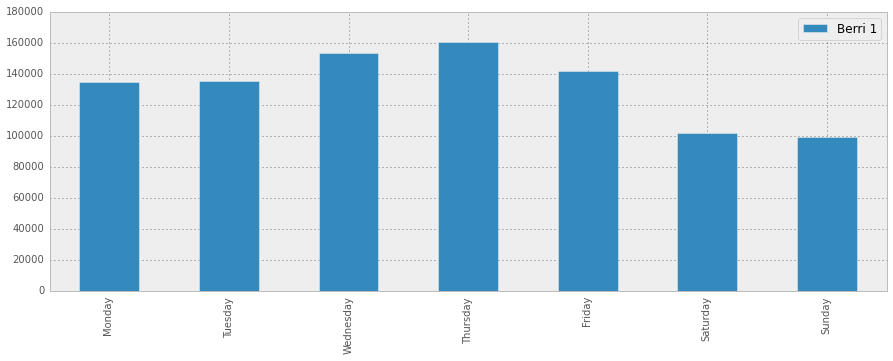

In [12]:
_ = weekday_counts.plot(kind='bar')

嗯，看来蒙特利尔市民更多地用自行车来通勤。

# 4.3 代码总结

现在把所有的代码放在一起，感受下6行pandas代码的魅力

如果你感兴趣的话，把`sum`换成`max`或者`numpy.median`或者是其他你喜欢的函数。

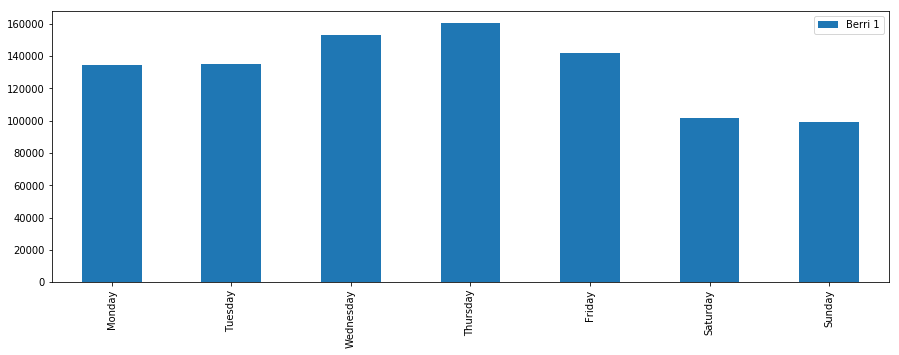

In [38]:
bikes = pd.read_csv('../data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')

# Add the weekday column
berri_bikes = bikes[['Berri 1']].copy()
berri_bikes['Weekday'] = berri_bikes.index.weekday

# Add up the number of cyclists by weekday, and plot!
weekday_counts = berri_bikes.groupby('Weekday').aggregate(sum)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts.plot(kind='bar')